In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline

In [173]:
train_new = pd.read_csv('data/data_enginneered/train_new.csv')
test_new = pd.read_csv('data/data_enginneered/test_new.csv')

In [174]:
train_new.sample(2)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Lenght/Weight,Weight__sqrt,Height/Weight,Diameter_red,Weight_sum,Length_sqrt
67395,67395,1,1.3125,1.0000,0.3500,20.071446,10.149121,4.422522,5.811648,9,0.065391,402.862945,0.017438,2.50000,20.383291,1.722656
20245,20245,2,1.5750,1.2125,0.5125,38.980562,15.351254,7.980384,11.623295,14,0.040405,1519.484253,0.013148,3.03125,34.954934,2.480625


In [175]:
test_new.sample(2)

,Unnamed: 0,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lenght/Weight,Weight__sqrt,Height/Weight,Diameter_red,Weight_sum,Length_sqrt
18724,18724,92775,0,1.5875,1.275,0.4125,34.373769,16.258438,7.399220,10.205820,0.046183,1181.555978,0.012000,3.1875,33.863478,2.520156
28857,28857,102908,2,1.2875,1.000,0.3500,20.312417,9.908150,4.011454,5.060386,0.063385,412.594274,0.017231,2.5000,18.979990,1.657656


In [176]:
train_new.shape, test_new.shape

((74051, 16), (49368, 16))

In [177]:
train_new.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Lenght/Weight',
       'Weight__sqrt', 'Height/Weight', 'Diameter_red', 'Weight_sum',
       'Length_sqrt'],
      dtype='object')

In [178]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  int64  
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
 10  Lenght/Weight   74051 non-null  float64
 11  Weight__sqrt    74051 non-null  float64
 12  Height/Weight   74051 non-null  float64
 13  Diameter_red    74051 non-null  float64
 14  Weight_sum      74051 non-null  float64
 15  Length_sqrt     74051 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 9.0 MB


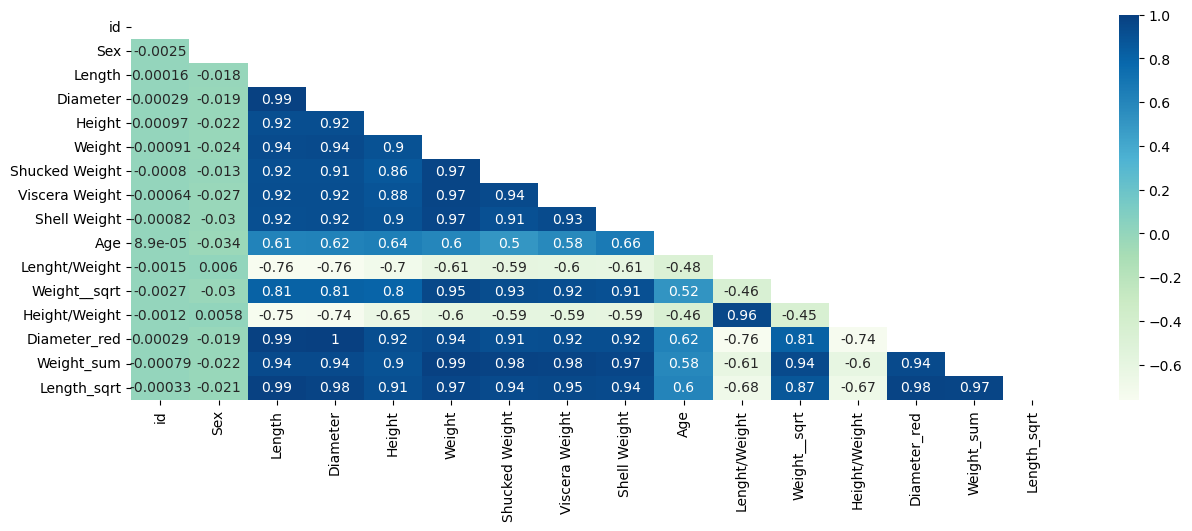

In [179]:
corr = train_new.corr()

plt.figure(figsize=(15, 5))
mask = np.triu(np.ones_like(train_new.corr()))
sns.heatmap(corr, annot=True, cbar=True, cmap='GnBu', mask=mask)
plt.show()

In [180]:
X = train_new.drop(['id', 'Age', 'Sex'], axis='columns')
y = train_new['Age']

In [181]:
X.shape, y.shape

((74051, 13), (74051,))

In [182]:
# Create a figure using Plotly Express
fig = px.histogram(y, nbins=30, opacity=0.7, color_discrete_sequence=['#1f77b4'])

# Add KDE (Kernel Density Estimation) curve
fig.update_traces(histnorm='density', histfunc='sum')
fig.update_layout(bargap=0.1)

# Show the plot
fig.show()


In [183]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [184]:
# Shape of train and test sets.

print(f'X Train data size: {X_train.shape}')
print(f'Y Train data size: {y_train.shape}')
print(f'X Test data size: {X_test.shape}')
print(f'Y Test data size: {y_test.shape}')

X Train data size: (51835, 13)
Y Train data size: (51835,)
X Test data size: (22216, 13)
Y Test data size: (22216,)


In [185]:
# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Create the XGBRegressor
xgb = XGBRegressor()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=skf)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


KeyboardInterrupt: 

In [201]:
# Discretize the target variable into bins or categories
num_bins = 3
y_bins = np.histogram(y, bins=num_bins)[1]
y_discrete = np.digitize(y, y_bins)

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
xgb_model = CatBoostRegressor(learning_rate=0.08, max_depth=5, n_estimators=2000, loss_function='MAE', eval_metric='MAE', l2_leaf_reg=3)
# Iterate over the splits
for train_index, test_index in skf.split(X, y_discrete):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Perform model training and evaluation on each split
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    mae = mean_absolute_error(y_pred, y_test)
    r2 = r2_score(y_pred, y_test)

    # Print the indices of the training and test data for each split
    print("Train Index:", train_index)
    print("Test Index:", test_index)
    print(f'MAE = {mae} \t | \t R2 Score = {r2}')
    print('-------------------------------------------------------------------')

/home/mrj/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 2.2586413	total: 150ms	remaining: 5m
1:	learn: 2.1763212	total: 205ms	remaining: 3m 24s
2:	learn: 2.1086708	total: 277ms	remaining: 3m 4s
3:	learn: 2.0486291	total: 329ms	remaining: 2m 44s
4:	learn: 1.9938579	total: 366ms	remaining: 2m 26s
5:	learn: 1.9416463	total: 437ms	remaining: 2m 25s
6:	learn: 1.9005885	total: 508ms	remaining: 2m 24s
7:	learn: 1.8584675	total: 623ms	remaining: 2m 35s
8:	learn: 1.8181533	total: 663ms	remaining: 2m 26s
9:	learn: 1.7876750	total: 734ms	remaining: 2m 26s
10:	learn: 1.7560603	total: 767ms	remaining: 2m 18s
11:	learn: 1.7304054	total: 805ms	remaining: 2m 13s
12:	learn: 1.7045068	total: 847ms	remaining: 2m 9s
13:	learn: 1.6810664	total: 893ms	remaining: 2m 6s
14:	learn: 1.6642958	total: 945ms	remaining: 2m 5s
15:	learn: 1.6498746	total: 990ms	remaining: 2m 2s
16:	learn: 1.6357525	total: 1.03s	remaining: 2m
17:	learn: 1.6241175	total: 1.06s	remaining: 1m 56s
18:	learn: 1.6146751	total: 1.09s	remaining: 1m 54s
19:	learn: 1.6010000	total: 1.13s	r

/home/mrj/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 2.2518011	total: 35.1ms	remaining: 1m 10s
1:	learn: 2.1718164	total: 86.9ms	remaining: 1m 26s
2:	learn: 2.1062531	total: 115ms	remaining: 1m 16s
3:	learn: 2.0439740	total: 224ms	remaining: 1m 51s
4:	learn: 1.9904491	total: 287ms	remaining: 1m 54s
5:	learn: 1.9376403	total: 313ms	remaining: 1m 44s
6:	learn: 1.8943120	total: 344ms	remaining: 1m 37s
7:	learn: 1.8530433	total: 376ms	remaining: 1m 33s
8:	learn: 1.8141147	total: 404ms	remaining: 1m 29s
9:	learn: 1.7817525	total: 468ms	remaining: 1m 33s
10:	learn: 1.7532443	total: 499ms	remaining: 1m 30s
11:	learn: 1.7270179	total: 529ms	remaining: 1m 27s
12:	learn: 1.7039487	total: 556ms	remaining: 1m 24s
13:	learn: 1.6839072	total: 583ms	remaining: 1m 22s
14:	learn: 1.6661752	total: 609ms	remaining: 1m 20s
15:	learn: 1.6466402	total: 635ms	remaining: 1m 18s
16:	learn: 1.6327660	total: 665ms	remaining: 1m 17s
17:	learn: 1.6172382	total: 705ms	remaining: 1m 17s
18:	learn: 1.6027298	total: 742ms	remaining: 1m 17s
19:	learn: 1.5905760

/home/mrj/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



0:	learn: 2.2558456	total: 73.6ms	remaining: 2m 27s
1:	learn: 2.1821655	total: 127ms	remaining: 2m 7s
2:	learn: 2.1209315	total: 170ms	remaining: 1m 53s
3:	learn: 2.0551983	total: 242ms	remaining: 2m
4:	learn: 2.0007011	total: 286ms	remaining: 1m 54s
5:	learn: 1.9470126	total: 392ms	remaining: 2m 10s
6:	learn: 1.9040938	total: 525ms	remaining: 2m 29s
7:	learn: 1.8625363	total: 624ms	remaining: 2m 35s
8:	learn: 1.8215906	total: 664ms	remaining: 2m 26s
9:	learn: 1.7821223	total: 730ms	remaining: 2m 25s
10:	learn: 1.7524614	total: 830ms	remaining: 2m 30s
11:	learn: 1.7250922	total: 914ms	remaining: 2m 31s
12:	learn: 1.6989692	total: 990ms	remaining: 2m 31s
13:	learn: 1.6794004	total: 1.07s	remaining: 2m 32s
14:	learn: 1.6585667	total: 1.17s	remaining: 2m 34s
15:	learn: 1.6423827	total: 1.26s	remaining: 2m 36s
16:	learn: 1.6257471	total: 1.4s	remaining: 2m 42s
17:	learn: 1.6136019	total: 1.48s	remaining: 2m 42s
18:	learn: 1.6032035	total: 1.53s	remaining: 2m 39s
19:	learn: 1.5917582	total:

In [202]:
y_pred = xgb_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

/home/mrj/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



1.3845223321612325

In [203]:
test_new.columns

Index(['Unnamed: 0', 'id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight',
       'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lenght/Weight',
       'Weight__sqrt', 'Height/Weight', 'Diameter_red', 'Weight_sum',
       'Length_sqrt'],
      dtype='object')

In [204]:
test = test_new.drop(['Unnamed: 0', 'id', 'Sex'], axis=1)

In [205]:
predictions = xgb_model.predict(test)

submission = pd.DataFrame()
submission['id'] = test_new[['id']]
submission['Age'] = predictions
submission = submission.set_index('id')
submission.to_csv('submission/submission.csv')

/home/mrj/anaconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

